### About Dataset
##### Context
The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

Number of Instances: 740 

Number of Attributes: 21

Missing Values: 0

Dataset :[https://archive.ics.uci.edu/dataset/445/absenteeism+at+work](https://archive.ics.uci.edu/dataset/445/absenteeism+at+work)

## Features in the Dataset (Columns)
1. Individual identification (ID)
2. Reason for absence (ICD). (Target) (Explained below)
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours


##### Reason for absence
ICD10 Codes: [https://icd.who.int/browse10/2016/en](https://icd.who.int/browse10/2016/en)

Absences attested by the International Code of Diseases (ICD) stratified into 21 categories as follows:

1. Certain infectious and parasitic diseases  
2. Neoplasms  
3. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
4. Endocrine, nutritional and metabolic diseases  
5. Mental and behavioural disorders  
6. Diseases of the nervous system  
7. Diseases of the eye and adnexa  
8. Diseases of the ear and mastoid process  
9. Diseases of the circulatory system  
10. Diseases of the respiratory system  
11. Diseases of the digestive system  
12. Diseases of the skin and subcutaneous tissue  
13. Diseases of the musculoskeletal system and connective tissue  
14. Diseases of the genitourinary system  
15. Pregnancy, childbirth and the puerperium  
16. Certain conditions originating in the perinatal period  
17. Congenital malformations, deformations and chromosomal abnormalities  
18. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
19. Injury, poisoning and certain other consequences of external causes  
20. External causes of morbidity and mortality  
21. Factors influencing health status and contact with health services.

And 7 categories without (ICD):
 
22. patient follow-up

23. medical consultation

24. blood donation

25. laboratory examination

26. unjustified absence

27. physiotherapy

28. dental consultation



In [94]:
# importing necessary libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px


In [95]:
# importing the dataset
df = pd.read_csv("Absenteeism_at_work.csv",delimiter=";")

## Data Scrubbing

In [96]:
# defining categorical attributes
categorical_atts = ['Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']
#defining the numerical  attributes 
numerical_atts = df.drop(columns=categorical_atts).columns.to_list()

**Unique Categoires in each Category:**

In [97]:
# checking the unique values in categorical attributes
df[categorical_atts].nunique()

Reason for absence      28
Month of absence        13
Day of the week          5
Seasons                  4
Disciplinary failure     2
Education                4
Social drinker           2
Social smoker            2
Pet                      6
Son                      5
dtype: int64

## Checking Null Values

In [98]:
# checking the null value in the dataset
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [100]:
ds = {1: "Certain infectious and parasitic", 2: "Neoplasms", 3: "blood and blood-forming organs and immune mechanism",
      4: "Endocrine, nutritional and metabolic diseases",
      5: "Mental and behavioural", 6: "nervous system", 7: "the eye and adnexa", 8: "the ear and mastoid process",
      9: "the circulatory system", 10: "respiratory system", 11: "the digestive system",
      12: "the skin and subcutaneous tissue", 13: "the musculoskeletal system and connective tissue",
      14: "the genitourinary system", 15: "Pregnancy, childbirth and the puerperium",
      16: "Certain conditions originating in the perinatal period",
      17: "Congenital malformations, deformations and chromosomal abnormalities",
      18: "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",
      19: "Injury, poisoning and certain other consequences of external causes",
      20: "External causes of morbidity and mortality",
      21: "Factors influencing health status and contact with health services",
      22: "patient follow-up", 23: "medical consultation", 24: "blood donation",
      25: "laboratory examination", 26: "unjustified absence",
      27: "physiotherapy", 28: "dental consultation"}


**Day and Week Encoding to find the outliers**

In [101]:
# convert day code to day
day_encoding={2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday'}
df['Day of the week Num']=df['Day of the week'].apply(lambda x : day_encoding[x])


In [102]:
month_encoding={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'october',11:'November',12:'December',0:'Unknow'}
df['Month of absence Num']=df['Month of absence'].apply(lambda x :month_encoding[x])


## Finding the Outliers for the Days of the week and Month of the year.

<Axes: xlabel='Day of the week Num', ylabel='Absenteeism time in hours'>

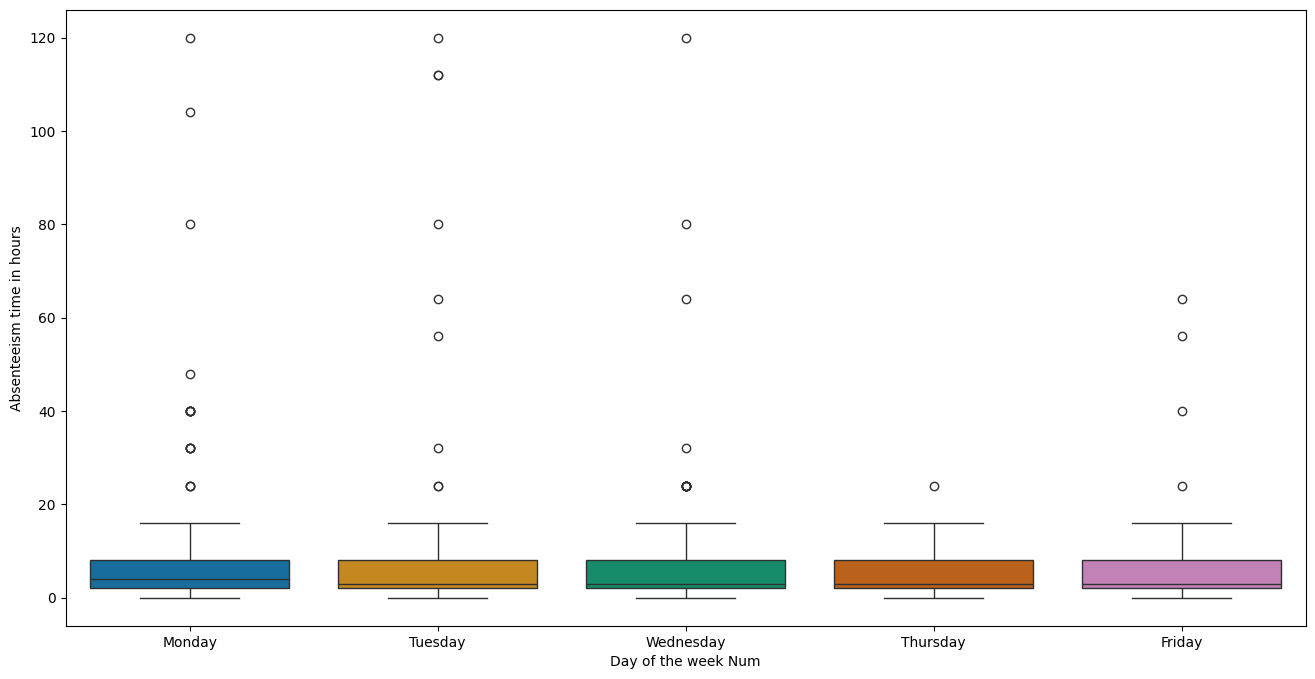

In [103]:

plt.figure(figsize=(16, 8))

sns.boxplot(x="Day of the week Num", y="Absenteeism time in hours",data=df, order=list(day_encoding.values()), palette="colorblind")    

<Axes: xlabel='Month of absence Num', ylabel='Absenteeism time in hours'>

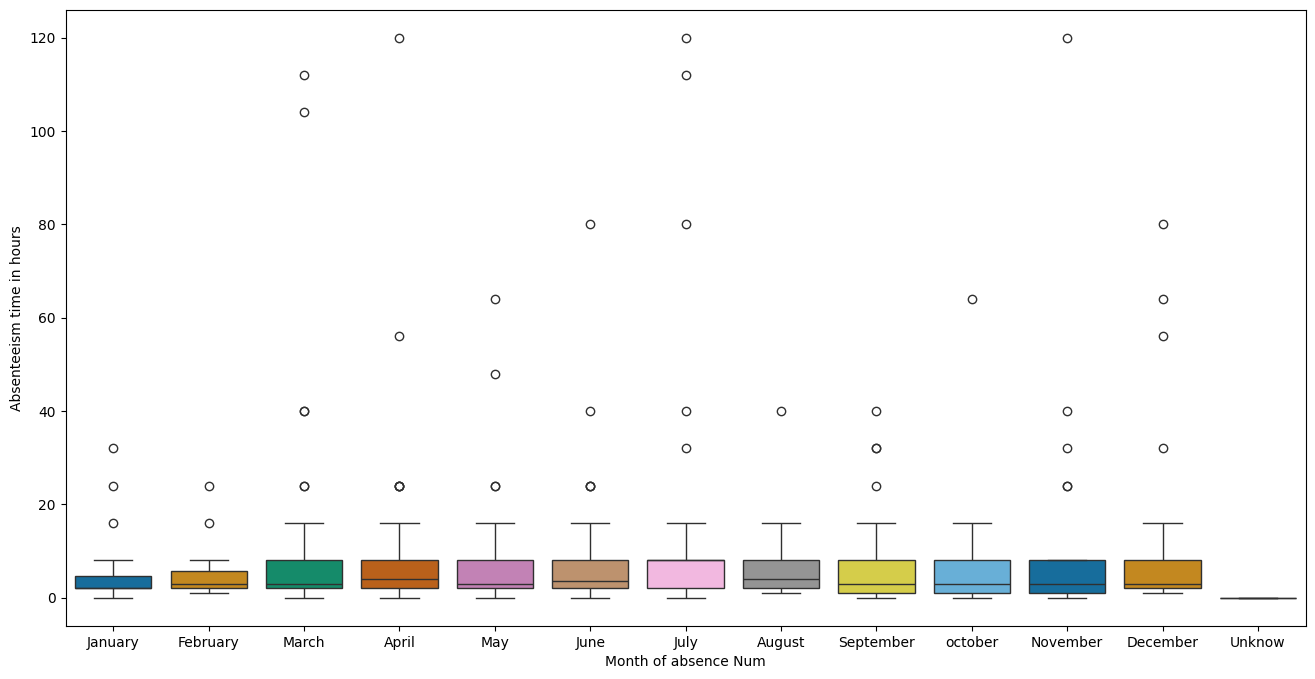

In [104]:

plt.figure(figsize=(16, 8))

sns.boxplot(x="Month of absence Num", y="Absenteeism time in hours",data=df, order=list(month_encoding.values()), palette="colorblind")    

In [105]:
df.drop(["Day of the week Num", "Month of absence Num"], axis=1, inplace=True)

## Outlier Removal

In [106]:
# Check for outliers using boxplots and drop them
for num_att in numerical_atts:
    # Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(df[num_att], [75,25])
    MEAN = df[num_att].mean()
    
    # Calculating Interquartile range
    IQR = Q3 - Q1
    
    # Calculating upper extream and lower extream
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    data_clean=df.drop(df.loc[df[num_att]< minimum,num_att].index) 
    data_clean=df.drop(df.loc[df[num_att]> maximum,num_att].index) 

## Training the classification Model

In [107]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier



from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler



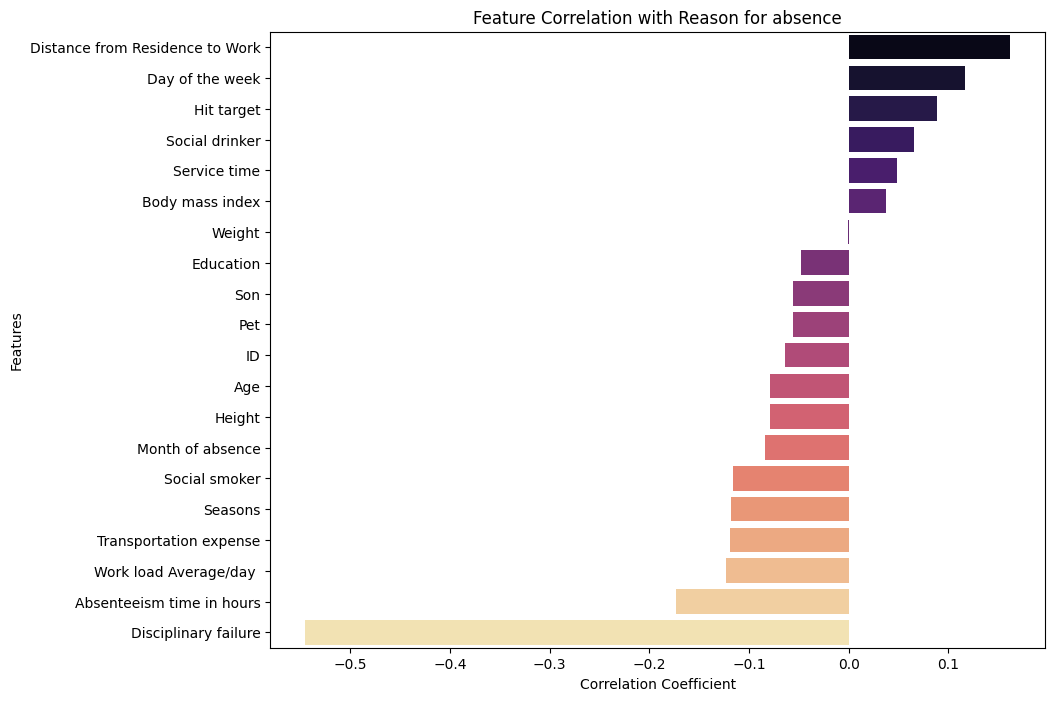

In [109]:
correlation_matrix = df.corr()

# Extracting the correlations of each feature with the target variable
target_correlations = correlation_matrix['Reason for absence'].drop('Reason for absence')  # Drop self-correlation
target_correlations = target_correlations.sort_values(ascending=False)  # Sort in descending order

# Creating the plot
plt.figure(figsize=(10, 8))
sns.barplot(x=target_correlations.values, y=target_correlations.index, hue=target_correlations.index ,palette="magma")
plt.title('Feature Correlation with Reason for absence')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

## Modelling

In [110]:
from typing import Any
class ClassificationReport:

    def __init__(self, model,model_name, X_test, y_test) -> None:
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        self.model_name = model_name

    
    def draw_cm(self,cm):

        fig, ax = plt.subplots(figsize=(8, 8))

        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        ax.set_title(f'Confusion Matrix - {self.model_name}')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')

        return fig
        

    def __call__(self) -> Any:  
     
        
        # make predictions using model 
        y_pred = self.model.predict(self.X_test)

        print("="*10,self.model_name,"="*10)

        print(f"Classification Report:\n")

        print(classification_report(self.y_test, y_pred))

        cm = confusion_matrix(self.y_test, y_pred)

        cm_figure = self.draw_cm(cm)

     
        cm_figure.show()


In [111]:
dfnew = df.drop("ID",axis=1)

In [112]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier


scR = RobustScaler()
scS = StandardScaler()
scM = MinMaxScaler()

l = [scR,scS,scM]

for i in l :
    i.fit(dfnew)


    

In [113]:

X = dfnew.drop("Reason for absence",axis=1) 
Y = dfnew["Reason for absence"]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [114]:
clf = RandomForestClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(f"Random ForestAccuracy: {accuracy_score(y_test, y_pred)}")

Random ForestAccuracy: 0.4918918918918919


========== RANDOM FOREST ==========
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.50      0.14      0.22         7
           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          10       0.25      0.14      0.18         7
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         3
          13       0.29      0.31      0.30        13
          14       0.14      0.33      0.20         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.50      0.22      0.31         9
          19       0.00      0.00      0.00         7
          22       0.

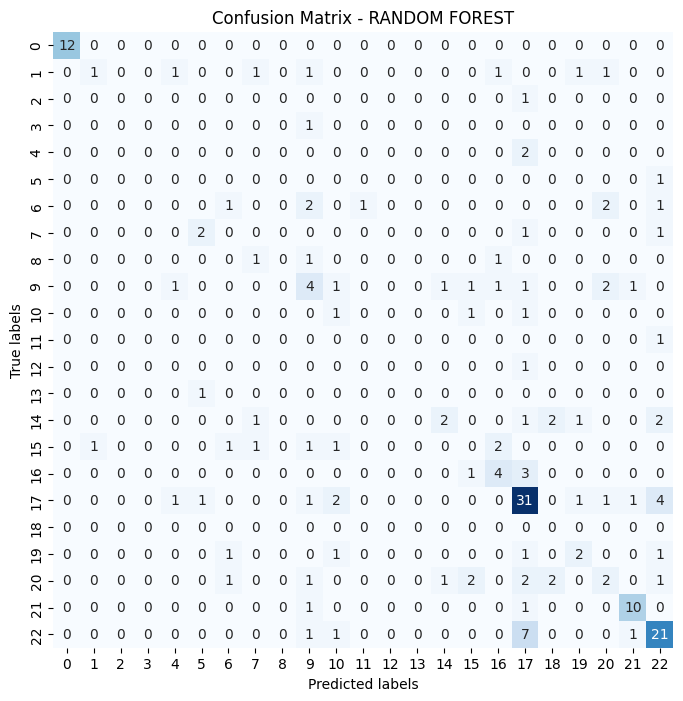

In [115]:
ClassificationReport(model=clf, model_name="RANDOM FOREST", X_test=X_test, y_test=y_test)()

In [116]:

clf2 = LGBMClassifier()


clf2.fit(X_train,y_train)

y_pred = clf2.predict(X_test)

print(f"LGBM ForestAccuracy: {accuracy_score(y_test, y_pred)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 555, number of used features: 19
[LightGBM] [Info] Start training from score -2.884981
[LightGBM] [Info] Start training from score -4.121744
[LightGBM] [Info] Start training from score -6.318968
[LightGBM] [Info] Start training from score -5.625821
[LightGBM] [Info] Start training from score -5.220356
[LightGBM] [Info] Start training from score -4.373058
[LightGBM] [Info] Start training from score -3.754019
[LightGBM] [Info] Start training from score -4.709530
[LightGBM] [Info] Start training from score -4.932674
[LightGBM] [Info] Start training from score -3.428596
[LightGBM] [Info] Start training from score -3.227926
[LightGBM] [Info] Start training from sc

========== LGBM Classifier ==========
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.50      0.14      0.22         7
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          10       0.17      0.14      0.15         7
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         3
          13       0.15      0.15      0.15        13
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.33      0.11      0.17         9
          19       

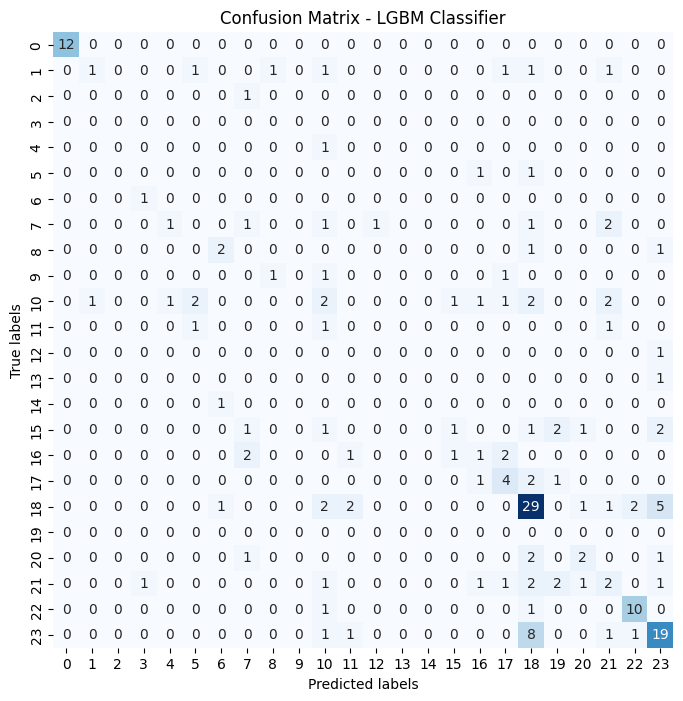

In [117]:
ClassificationReport(model=clf2, model_name="LGBM Classifier", X_test=X_test, y_test=y_test)()

## SemiSupervised

**For semisupervised, scaling the numerical features:**

In [118]:
numeric_transformer = MinMaxScaler()

numerical_atts = [x for x in numerical_atts if x not in ['Absenteeism time in hours']]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_atts),
        ('cat', 'passthrough', categorical_atts)
    ], remainder='passthrough')
data_pp = preprocessor.fit_transform(data_clean)

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.express as px

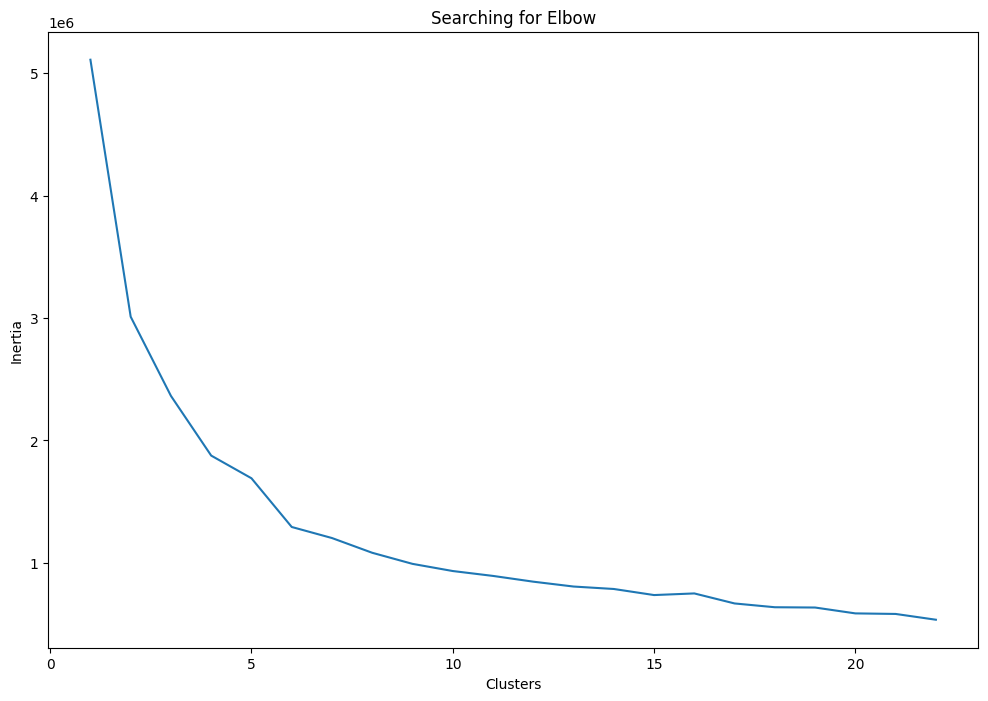

In [120]:
clusters = []

for i in range(1, 23):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 23)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

**Testing for 2 Clusters**

In [121]:
km2 = KMeans(n_clusters=2).fit(df)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( df)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()

**Testing for 4 Clusters**

In [122]:
km2 = KMeans(n_clusters=4).fit(df)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( df)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()